<a href="https://colab.research.google.com/github/yaswanth-142004/Artificial_Intelligence_in_marketing_project/blob/main/edunet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project TItle : Exploratory Data Analysis on Cardekho dataset.

## Name : Yaswanth Sai Valluru
## Roll-NO: AP22110011098
## E-mail : yaswanthsai_valluru@srmap.edu.in

## The following Questions need to be answered from the data-set.
1. From which manufacturing year to which manufacturing year vehicles are present in this data?
2. What is the lowest price to which a vehicle is sold?
3. What is the highest price to which a vehicle is sold?
4. How many records are there in this data?
5. Are there any missing records in this data?
6. How many different vehicles are present in this data?
7. Which is the most sold vehicle in this data?
8. Does the database include any CNG vehicle? If yes, how many of them are there?
9. How many vehicles here are for sale from individuals directly?
10. Does this database contain auto transmission vehicles? If yes, how many of them are there?
11. How many single person owned vehicles are there in this database?
12. Which is the most and least cost depreciated vehicle in data?
13. Which brands of vehicles are less affected by cost depreciation?
14. Are there any factors which you feel affect the cost depreciation?
15. In general, is the selling price affected by the age of the vehicle and the distance driven by the vehicle? Is it observable from data?
16. Can we get an idea about the newest vehicles i.e. after 2014 manufactured?
17. Can we find out data of only two wheelers from this data? Which is the oldest bike sold here?
18. Which is the newest bike sold here?
19. Which is the most sold bike here?
20. Do you find any deal in two wheelers which exceeded the general expectation? Can you find the reason for it?
21. Can we find out data of only cars from this data?
22. Which is the oldest car sold here?
23. Which is the newest car sold here?
24. Do you find any deal in cars which exceeded the general expectation? Can you find the reason for it?
find reason for it ?</p>

## Q-1) From which manufacturing year to which manufacturing year vehicles are present in this data?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/car_Dekho_DA.csv")
df = pd.DataFrame(df)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
max_year = df["Year"].max()
min_year = df["Year"].min()
print(f"the years ranges from {min_year} to {max_year}")

the years ranges from 2003 to 2018


## Q-2) What is the lowest price to which a vehicle is sold?

In [5]:
lowest_price_vehicle_sold = df["Selling_Price"].min()
print(f"The lowest price a vehicle sold is {lowest_price_vehicle_sold} lakhs")

The lowest price a vehicle sold is 0.1 lakhs


## Q-3) What is the highest price to which a vehicle is sold?

In [6]:
highest_price_vehicle_sold = df["Selling_Price"].max()
print(f"The highest price a vehicle sold is {highest_price_vehicle_sold} lakhs")

The highest price a vehicle sold is 35.0 lakhs


## Q-4) How many records are there in this data?

In [7]:
no_of_records = df.shape[0]
print(f"Total number of records int the dataframe are {no_of_records}")

Total number of records int the dataframe are 301


## q-5) Are there any missing records in this data?

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(f"by observing the previous cell we can conclude that there are no null values in the dataset")

by observing the previous cell we can conclude that there are no null values in the dataset


## Q-6) How many different vehicles are present in this data?

In [10]:
different_vehicles = df["Car_Name"].nunique()
print(f"The number of different vehicles are {different_vehicles}")

The number of different vehicles are 98


## q-7) Which is the most sold vehicle in this data?

In [11]:
most_sold_car = df["Car_Name"].mode()
print(f"the most sold car is {most_sold_car}")

the most sold car is 0    city
Name: Car_Name, dtype: object


## Q-8) Does the database include any CNG vehicle? If yes, how many of them are there?

In [12]:
no_of_cng = (df["Fuel_Type"] == "CNG").sum()
print(f"Number of cng vehicles are {no_of_cng} ")

Number of cng vehicles are 2 


## Q-9) How many vehicles here are for sale from individuals directly?

In [13]:
 m= df["Seller_Type"].value_counts()

indi_count = m["Individual"]
print(f"the individual sellers are {indi_count}")

the individual sellers are 106


## Q-10) Does this database contain auto transmission vehicles? If yes, how many of them are there?

<Axes: xlabel='Transmission'>

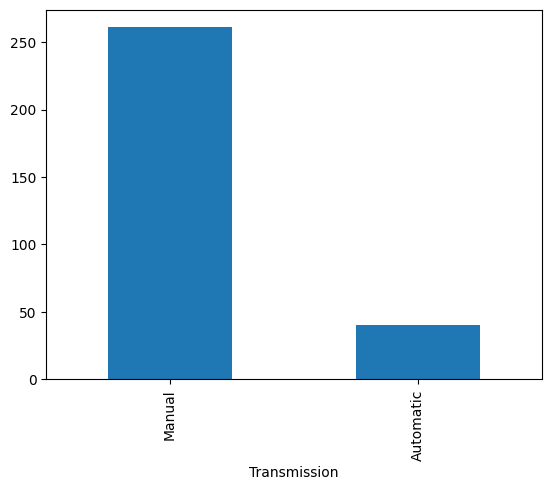

In [14]:
  df["Transmission"].value_counts().plot.bar()



In [15]:
auto_count = df["Transmission"].value_counts()["Automatic"]
print(f"Number of automatic cars are {auto_count}")

Number of automatic cars are 40


## Q-11)How many single person owned vehicles are there in this database?

In [16]:
single_owner_vehicles = df["Owner"].value_counts()[1]
print(f"There are {single_owner_vehicles} single person owned vehicles")

There are 10 single person owned vehicles


<Axes: xlabel='Owner'>

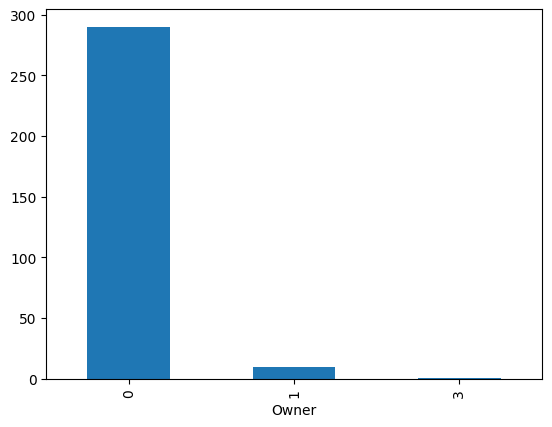

In [17]:
df["Owner"].value_counts().plot.bar()

## Q-12) Which is the most and least cost depreciated vehicle in data?

In [18]:
df['depriciation'] = df['Present_Price'] - df['Selling_Price']
most_dep_vehicle = df.loc[df.depriciation == df.depriciation.max()]["Car_Name"]
least_dep_vehicle = df.loc[df.depriciation == df.depriciation.min()]["Car_Name"]

print(f"The most depriciated vehicle is --- {most_dep_vehicle.values[0]}---   and the least depriciated vehicle is ---{least_dep_vehicle.values[0]} ")

The most depriciated vehicle is --- land cruiser---   and the least depriciated vehicle is ---Honda Activa 4G 


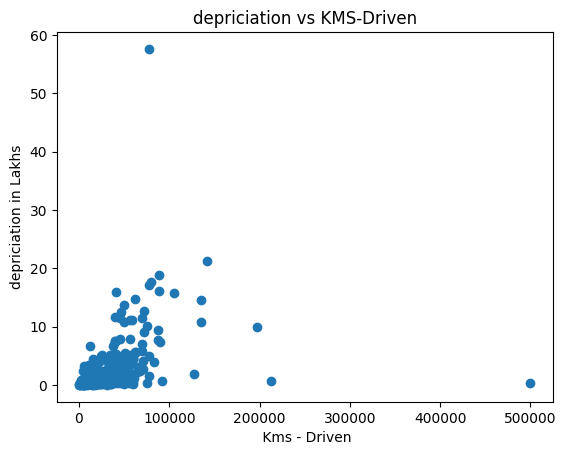

In [19]:
plt.scatter(df.Kms_Driven,df.depriciation)
plt.xlabel(" Kms - Driven")
plt.ylabel ( "depriciation in Lakhs")
plt.title ("depriciation vs KMS-Driven")
plt.show()

##  Q-13)Which brands of vehicles are less affected by cost depreciation?

In [20]:
mn = df.depriciation.median()


less_effected_vehicles = df.loc[df.depriciation <= mn]["Car_Name"]

print(f"the vehicle which are less effected by cost depriciation are {less_effected_vehicles}")

the vehicle which are less effected by cost depriciation are 3            wagon r
5      vitara brezza
6               ciaz
8               ciaz
9               ciaz
           ...      
280             brio
285             jazz
291             brio
299             city
300             brio
Name: Car_Name, Length: 151, dtype: object


<Axes: xlabel='Car_Name'>

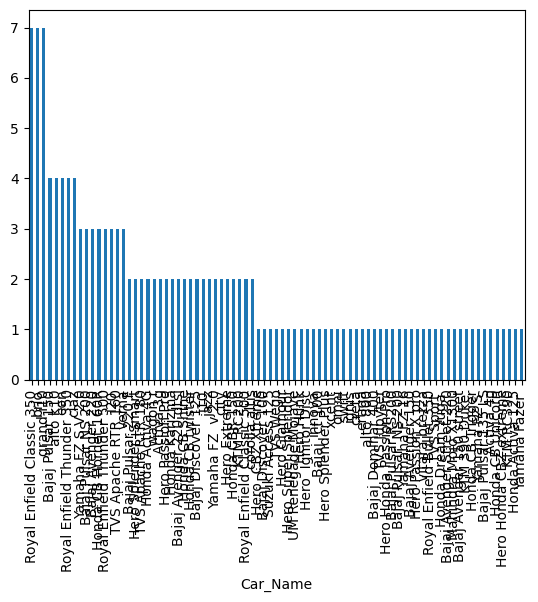

In [21]:
less_effected_vehicles.value_counts().plot.bar()

## Q-14) Are there any factors which you feel affect the cost depreciation?

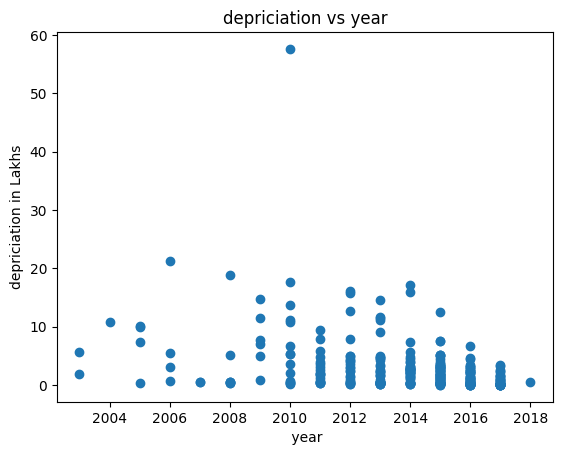

In [22]:
plt.scatter(df.Year,df.depriciation)
plt.xlabel(" year")
plt.ylabel ( "depriciation in Lakhs")
plt.title ("depriciation vs year")
plt.show()

## Q-15) In general, is the selling price affected by the age of the vehicle and the distance driven by the vehicle? Is it observable from data?

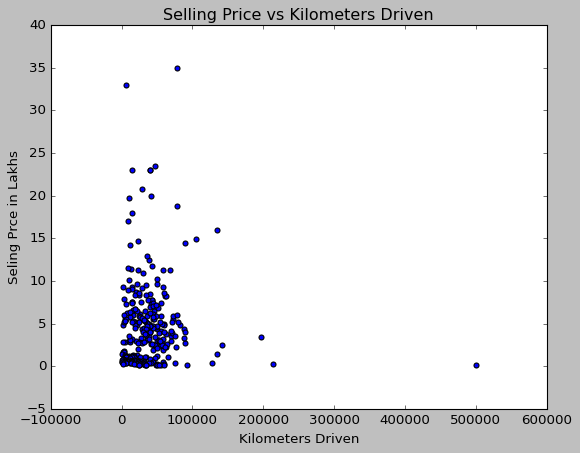

In [23]:

plt.style.use('classic')
plt.scatter(df.Kms_Driven, df.Selling_Price)
plt.xlabel ("Kilometers Driven")
plt.ylabel ("Seling Prce in Lakhs")
plt.title ("Selling Price vs Kilometers Driven")

plt.show()


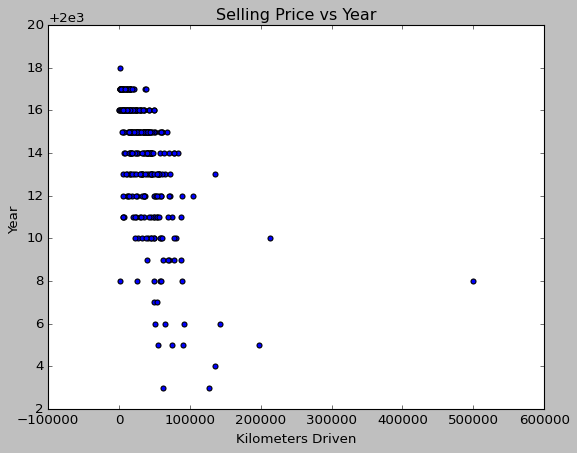

In [24]:
plt.style.use('classic')
plt.scatter(df.Kms_Driven, df.Year)
plt.xlabel ("Kilometers Driven")
plt.ylabel ("Year ")
plt.title ("Selling Price vs Year")

plt.show()


<Axes: xlabel='count', ylabel='Car_Name'>

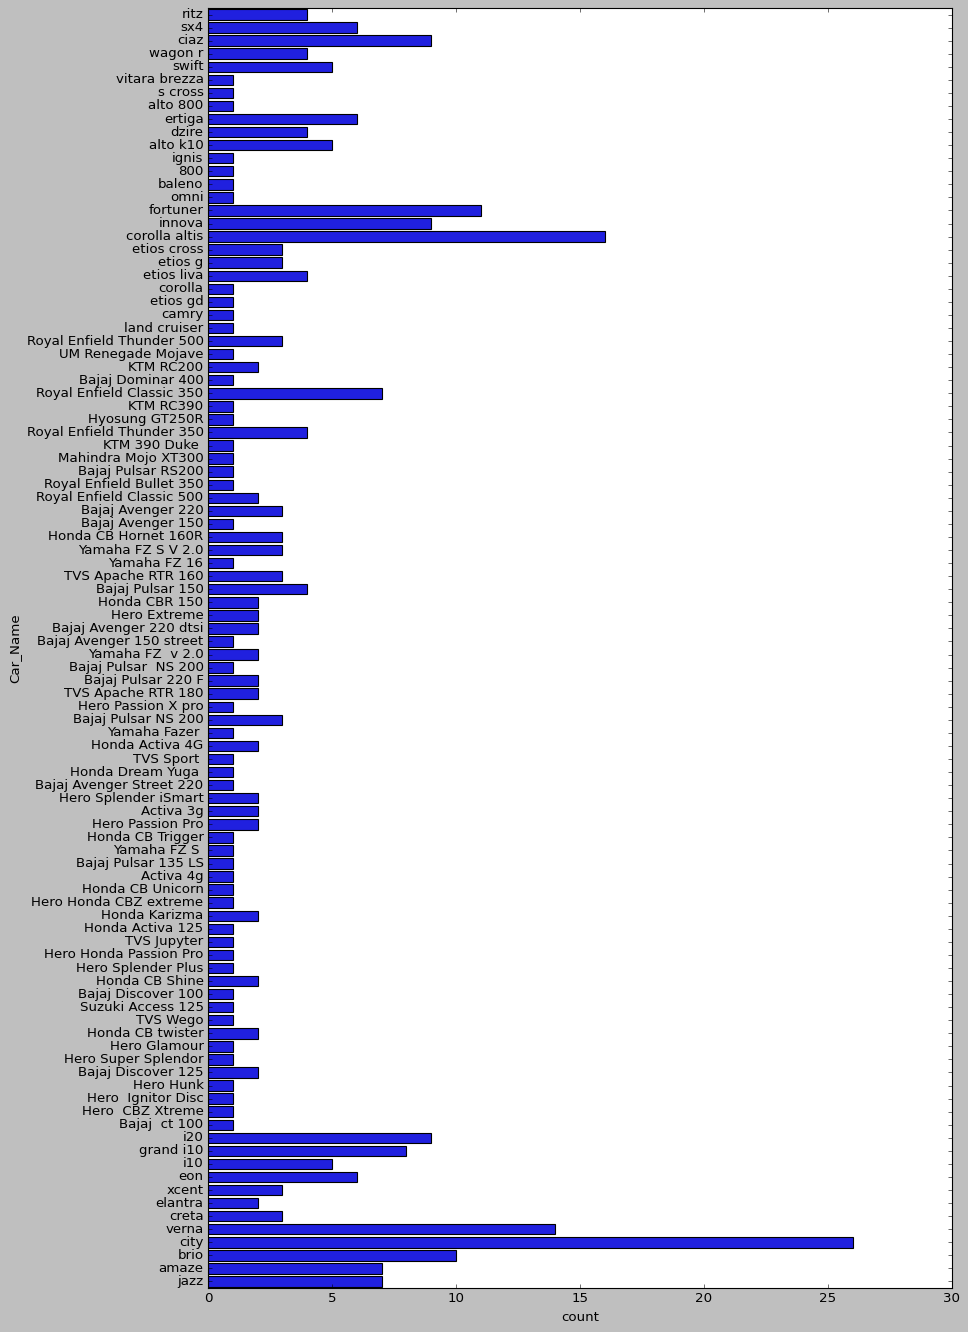

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = df.Car_Name,ax = ax ,data = df)


<function matplotlib.pyplot.show(close=None, block=None)>

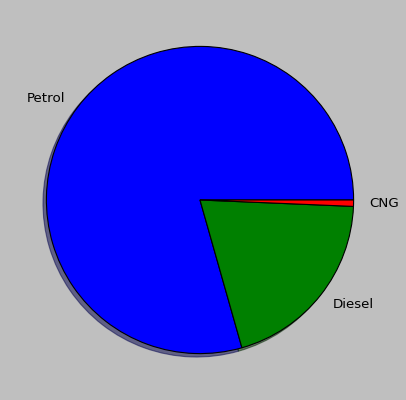

In [26]:
plt.pie(df.Fuel_Type.value_counts(),labels = ["Petrol", "Diesel" , "CNG"],shadow = True)
plt.show

<Axes: xlabel='Fuel_Type'>

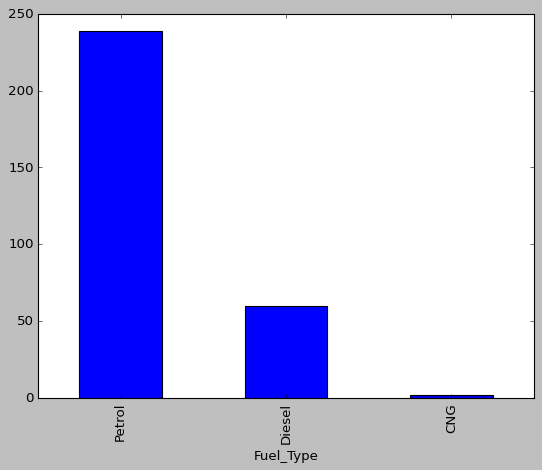

In [27]:
df.Fuel_Type.value_counts().plot.bar()

## Q- 16) Can we get an idea about the newest vehicles i.e. after 2014 manufactured?

In [28]:
new_vehicles = df[df['Year'] >= 2015]


<Axes: xlabel='count', ylabel='Car_Name'>

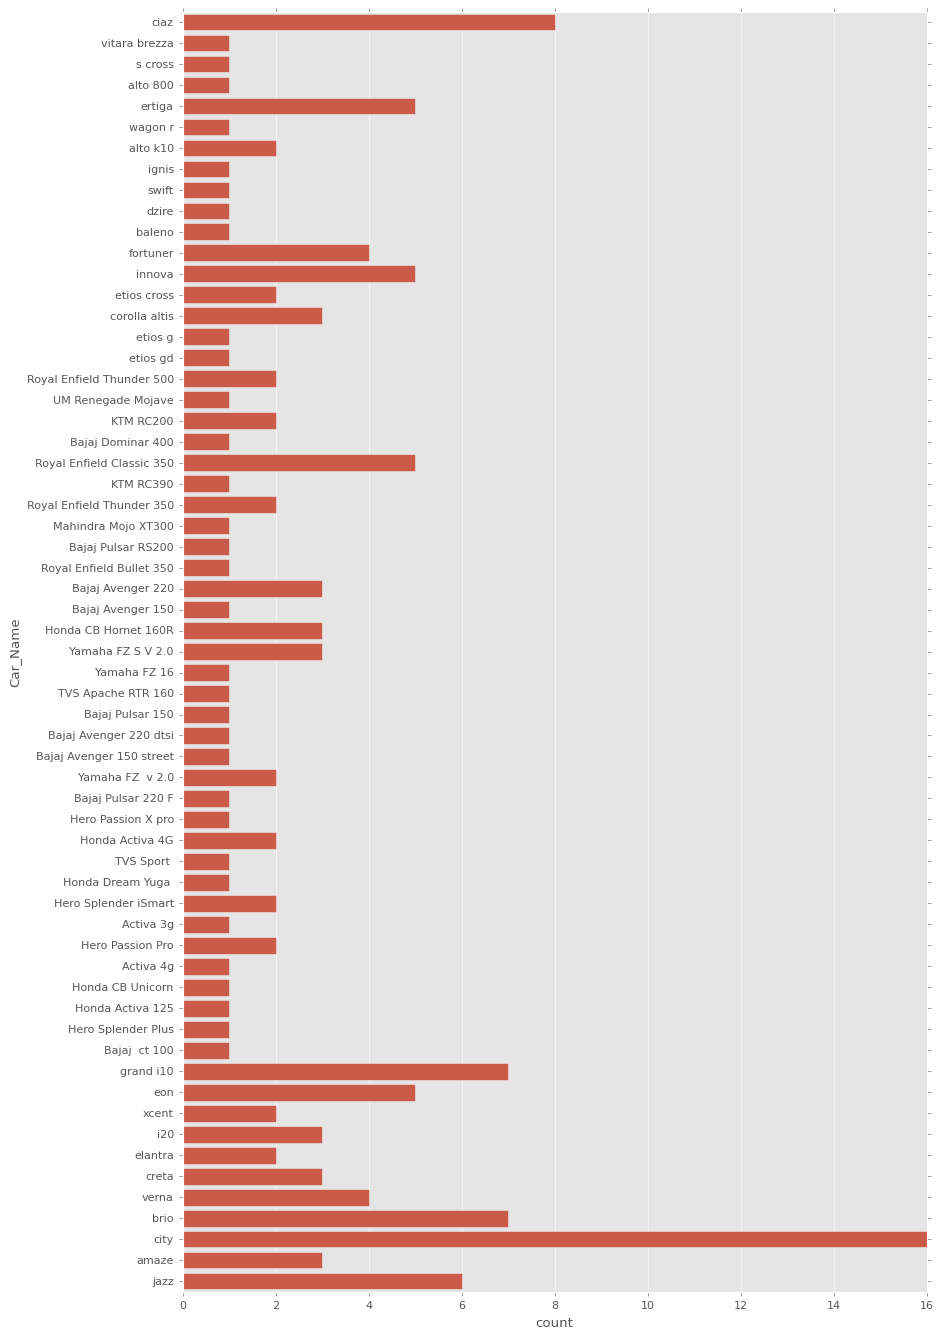

In [29]:
plt.style.use('ggplot')
fig_dims = (12,20)
fig,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = new_vehicles.Car_Name,ax = ax ,data = new_vehicles)



## Q-17) Can we find out data of only two wheelers from this data? Which is the oldest bike sold here?

In [30]:
two_wheelers = df[df["Present_Price"]<3.5]
print(two_wheelers.head())

                      Car_Name  Year  Selling_Price  Present_Price  \
23                    alto k10  2014           2.50           3.46   
37                         800  2003           0.35           2.28   
44                        omni  2012           1.25           2.69   
100  Royal Enfield Thunder 500  2016           1.75           1.90   
101         UM Renegade Mojave  2017           1.70           1.82   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  depriciation  
23        45280    Petrol      Dealer       Manual      0          0.96  
37       127000    Petrol  Individual       Manual      0          1.93  
44        50000    Petrol      Dealer       Manual      0          1.44  
100        3000    Petrol  Individual       Manual      0          0.15  
101        1400    Petrol  Individual       Manual      0          0.12  


In [31]:
two_wheelers.reset_index(drop=True,inplace=True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12


In [32]:
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


In [33]:
two_wheelers.reset_index(drop=True,inplace=True)

In [34]:
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


In [35]:
old_bike = two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]
old_bike_name = old_bike["Car_Name"].values[0]
print(f"The oldest bike sold is {old_bike_name}")

The oldest bike sold is Hero Super Splendor


## q-18) Which is the newest bike sold here?

In [36]:
New_bikes = two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]
New_bikes_names = New_bikes["Car_Name"].values
print(f"the newest bikes sold are {New_bikes_names} ")

the newest bikes sold are ['UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'Royal Enfield Classic 350'
 'Bajaj Avenger 220' 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0'
 'Honda CB Hornet 160R' 'Bajaj Avenger 220' 'TVS Apache RTR 160'
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga ' 'Honda Activa 4G'
 'Activa 4g'] 


## Q-19) Which is the most sold bike here?

In [37]:
most_sold_bike = two_wheelers['Car_Name'].value_counts().index[0]
print(f"The most sold bike is {most_sold_bike}")

The most sold bike is Royal Enfield Classic 350


## Q-20) Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?

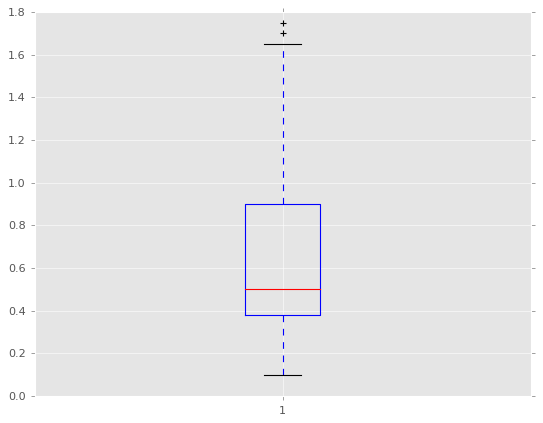

In [38]:

plt.boxplot(two_wheelers.Selling_Price)
plt.show()

<Axes: xlabel='count', ylabel='Car_Name'>

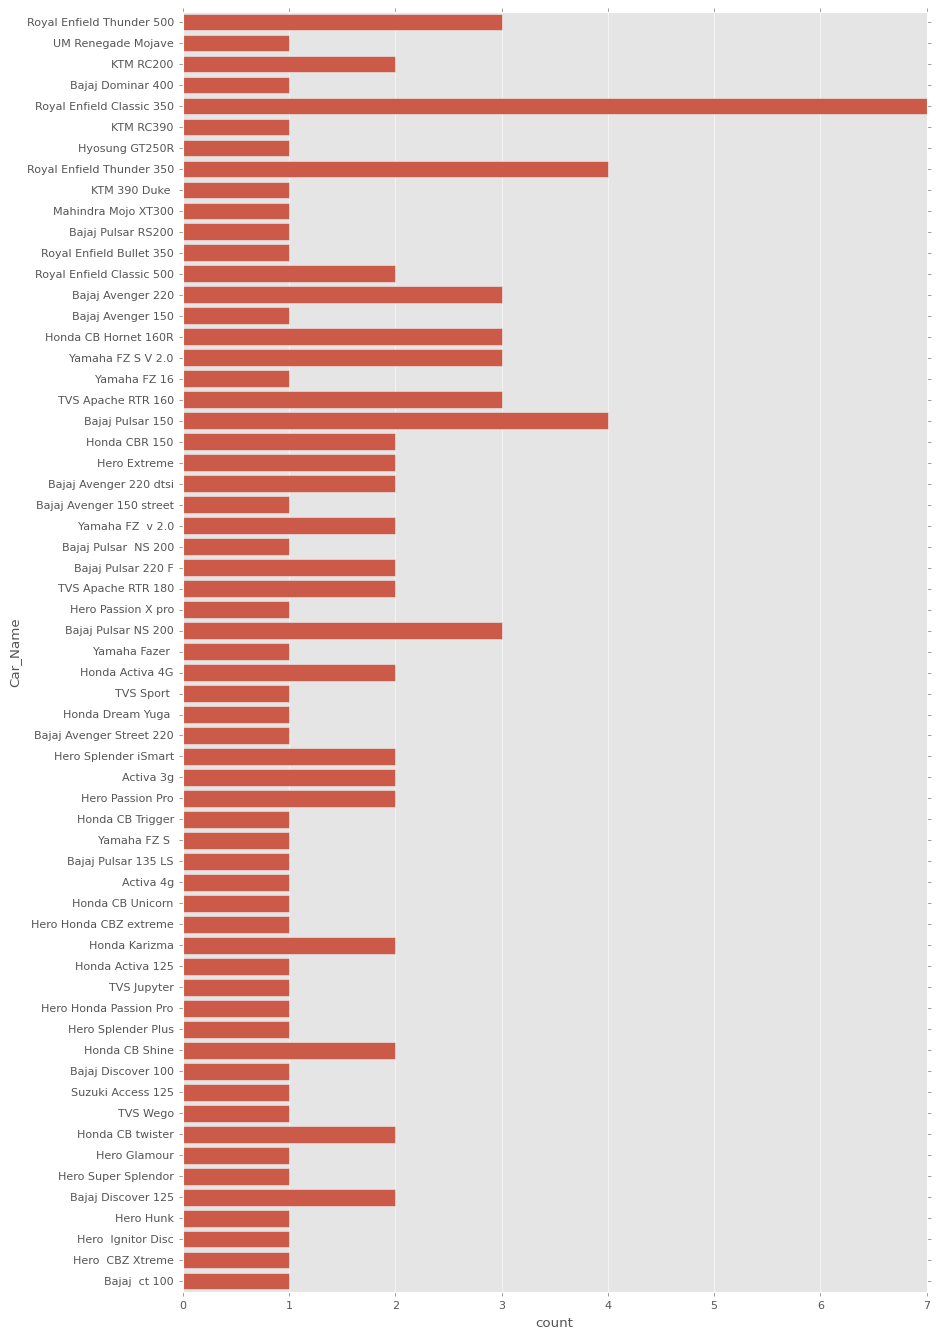

In [39]:

fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = two_wheelers.Car_Name,ax = ax ,data = two_wheelers)


## Q-21) Can we find out data of only cars from this data ?

In [43]:
four_wheelers = pd.DataFrame()

two_wheelers["Present_Price"].max()

3.45

In [48]:
# as the max present price of two wheelers is 3.45 we can conclude that the min car price amy start at 3.45
four_wheelers = df.loc[df["Present_Price"]>= 3.45]
four_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


## Q-22) Which is the oldest car sold here?

In [49]:

oldest_cars = four_wheelers.loc[four_wheelers.Year == four_wheelers.Year.min()]
print(f"the oldest cars are")
oldest_cars

the oldest cars are


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73


## Q-23) Which is the newest car sold here?

In [50]:
newest_cars = four_wheelers.loc[four_wheelers.Year == four_wheelers.Year.max()]
print(f"the newest cars are")
newest_cars

the newest cars are


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58


## Q-24) Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

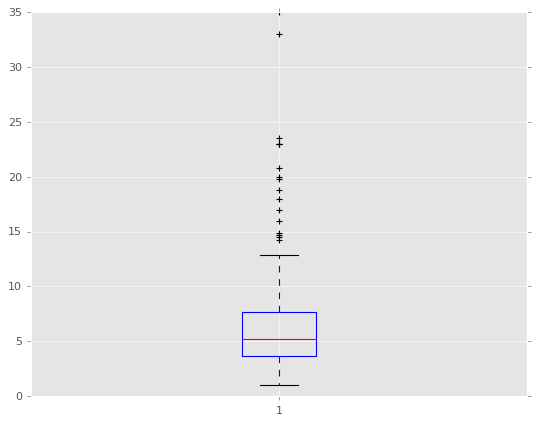

In [51]:
plt.boxplot(four_wheelers.Selling_Price)
plt.show()

In [52]:
# checking for the outliers
four_wheelers[four_wheelers["Selling_Price"] >= 23]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
51,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0,7.61
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,12.46
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3.23
82,innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0,2.39
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,57.60
93,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0,7.61


<Axes: xlabel='count', ylabel='Car_Name'>

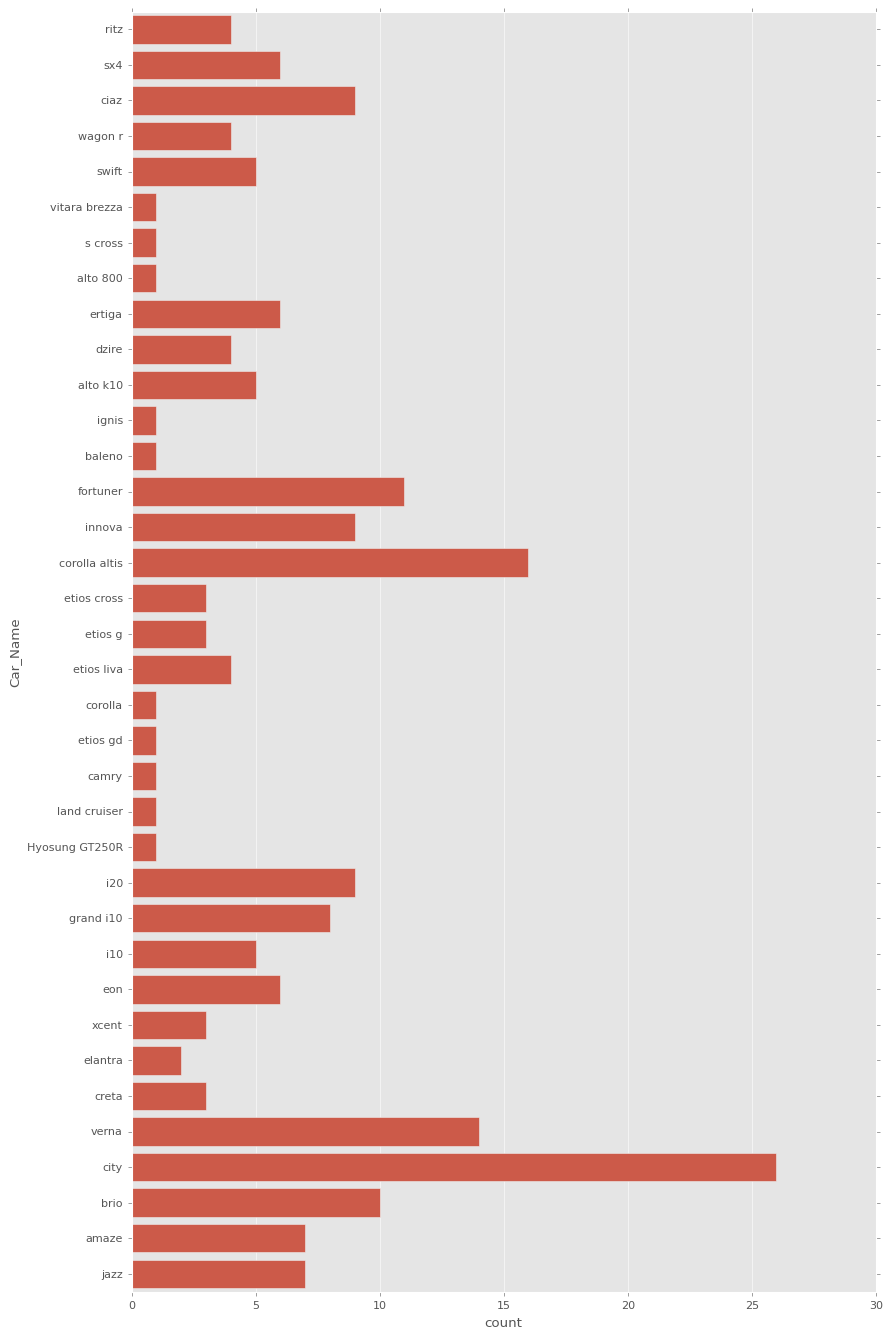

In [53]:
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = four_wheelers.Car_Name,ax = ax ,data = four_wheelers)